**Importing Libraries**

In [62]:
import yfinance as yf
import pandas as pd
import numpy as np

**Basic EDA**

In [63]:
sp500 = yf.Ticker("^GSPC")


In [64]:
#Queries all the data since the beginning of the Index
sp500 = sp500.history(period = "max")

In [65]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,0,0
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,0,0
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,0,0
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,0,0
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,0,0
...,...,...,...,...,...,...,...
2022-10-20,3689.050049,3736.000000,3656.439941,3665.780029,4496620000,0,0
2022-10-21,3657.100098,3757.889893,3647.419922,3752.750000,5078020000,0,0
2022-10-24,3762.010010,3810.739990,3741.649902,3797.340088,4747930000,0,0


In [66]:
sp500.index

DatetimeIndex(['1950-01-03', '1950-01-04', '1950-01-05', '1950-01-06',
               '1950-01-09', '1950-01-10', '1950-01-11', '1950-01-12',
               '1950-01-13', '1950-01-16',
               ...
               '2022-10-13', '2022-10-14', '2022-10-17', '2022-10-18',
               '2022-10-19', '2022-10-20', '2022-10-21', '2022-10-24',
               '2022-10-25', '2022-10-26'],
              dtype='datetime64[ns]', name='Date', length=18324, freq=None)

***Cleaning and Visualizing our Stock Market Data***

<AxesSubplot:xlabel='Date'>

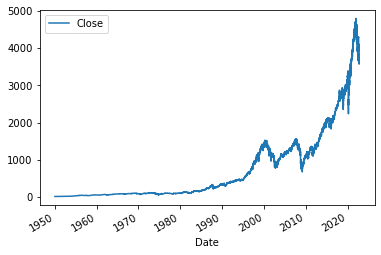

In [67]:
sp500.plot.line(y = 'Close', use_index = True)

In [68]:
#Removing the columns we don't need
#These columns are important for individual stocks only that's why we don't need them
del sp500["Dividends"]
del sp500["Stock Splits"]

In [69]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [70]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,16.850000
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,16.930000
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,16.980000
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,17.080000
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,17.030001
...,...,...,...,...,...,...
2022-10-20,3689.050049,3736.000000,3656.439941,3665.780029,4496620000,3752.750000
2022-10-21,3657.100098,3757.889893,3647.419922,3752.750000,5078020000,3797.340088
2022-10-24,3762.010010,3810.739990,3741.649902,3797.340088,4747930000,3859.110107


In [71]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [72]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,16.850000,1
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,16.930000,1
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,16.980000,1
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,17.080000,1
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,17.030001,0
...,...,...,...,...,...,...,...
2022-10-20,3689.050049,3736.000000,3656.439941,3665.780029,4496620000,3752.750000,1
2022-10-21,3657.100098,3757.889893,3647.419922,3752.750000,5078020000,3797.340088,1
2022-10-24,3762.010010,3810.739990,3741.649902,3797.340088,4747930000,3859.110107,1


In [73]:
#remove data that came before 1990 so that we don't take too much data

In [74]:
sp500 = sp500.loc["1990-01-01":].copy()

**Initial Machine Learning Model**

In [75]:
from sklearn.ensemble import RandomForestClassifier
#Picks up non-linear relationships

In [76]:
model = RandomForestClassifier(n_estimators = 100, min_samples_split = 100, random_state = 1)
train = sp500.iloc[:-100]#with time series data you can't use time series data, since it cause leakage
test = sp500.iloc[-100:]

predictors = ["Close","Volume","Open","High","Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [77]:
from sklearn.metrics import precision_score
preds =model.predict(test[predictors])
preds = pd.Series(preds, index = test.index)

In [78]:
precision_score(test["Target"], preds)

0.4125

In [79]:
combined = pd.concat([test["Target"], preds], axis = 1)

<AxesSubplot:xlabel='Date'>

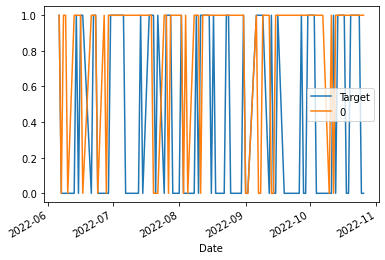

In [80]:
combined.plot()  

In [84]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index = test.index, name = "Predictions")
    combined = pd.concat([test["Target"], preds], axis = 1)
    return combined

In [85]:
def backtest(data, model, predictors, start = 2500, step = 250):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [86]:
predictions= backtest(sp500, model, predictors)

In [87]:
predictions["Predictions"].value_counts()

0    3341
1    2429
Name: Predictions, dtype: int64

In [88]:
precision_score(predictions["Target"], predictions["Predictions"])

0.532317826265953

In [89]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.535009
0    0.464991
Name: Target, dtype: float64

In [94]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"]/ rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors += [ratio_column, trend_column]
    

In [96]:
sp500 = sp500.dropna()


In [97]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-19,3703.110107,3728.580078,3666.510010,3695.159912,4223800000,3665.780029,0,0.996653,1.0,1.007071,3.0,0.937480,24.0,0.869766,115.0,1.034957,545.0
2022-10-20,3689.050049,3736.000000,3656.439941,3665.780029,4496620000,3752.750000,1,0.996009,0.0,0.999289,2.0,0.931435,23.0,0.863565,115.0,1.026445,544.0
2022-10-21,3657.100098,3757.889893,3647.419922,3752.750000,5078020000,3797.340088,1,1.011723,1.0,1.013620,3.0,0.954826,23.0,0.884731,115.0,1.050491,544.0


In [98]:
model = RandomForestClassifier(n_estimators = 200, min_samples_split = 50, random_state = 1)

In [99]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index = test.index, name = "Predictions")
    combined = pd.concat([test["Target"], preds], axis = 1)
    return combined

In [100]:
predictions = backtest(sp500, model, new_predictors)

In [101]:
predictions["Predictions"].value_counts()

1    3409
0    1360
Name: Predictions, dtype: int64

In [103]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5541214432384863